# PHASE 1 PROJECT - MORINGA SCHOOL

## Overview

**Objective:**
The objective is to examine data on movies, determine why such movies perform they way they do, and recommend the best types of movies MICROSOFT's new studio should produce to increase business returns and profitability.

**Background and Context:**
In less than five (5) months, James Cameron's Avatar: The Way of the Water (2022) surpassed the two billion dollar mark in the box office. That is alot of cash coming in for just one movie. 

You might think that its luck, but you got to be very very smart to be lucky twice, considering the first Avatar (2009) has approximated 2.9 billion dollars in the box office too. I don't think its about luck to be successful in the film industry, I believe choosing the types of films that appeal best to the viewers will definitely bring in good results. 

Historical data on films gives us sufficient basis, which, when looked at the right way, can help determine what type of films to invest and why.

**A screenshot obtained from Box Office Mojo on the top 10 highest grossing films as of April 16 2023.** 
![Source: https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW](Images/top_lifetime_grosses_films.png)

## Business Understanding

Every year, hundreds of films are produced, but only a few make profits. This is bad for business. Such failures mean shareholders lose money, employees (writers, directors, actors and actresses) lose their jobs, and viewers are left dissappointed, after all, without profits, there may be no need to continue.

Augmenting business profit margins is the best thing a business can do and MICROSOFT can definitely do so. Establishing a film studio is one thing: producing films that brings profits/benefits for the shareholders is something else. Hence, producing films that bring good returns would help MICROSOFT in so many ways. 

Let us take a look. Shareholders need more profit, its why they invested in MICROSOFT in the first place. We also have employees  that need to be looked after. Big profits would also propagate the company higher in terms of valuation, and that means employees can be paid well.

What about customers? Let us not forget them, after all, without them the studio would not matter. Good profits could also mean that the studio keeps operating, and therefore, providing them consistently with epic films. And maybe, we could avoid problems of creating TV Shows and cancelling them after one or two seasons when they fail to impress financially, leaving viewers distraught, as Netflix has been doing.

It is for these reasons I believe focusing on profitable film types is good for MICROSOFT.

## Data Understanding

### Sources of Data


**Data Sources:**
To understand the types of films the new Microsoft studio needs to produce, we first need to examine how the industry has perfomed, films that have performed well in the box office and their genres, and try to use statistical data to infer the reasons why they performed well and how that can be replicated by the studio.

I would say that the results are as good as the data used. In this analysis, we use data collected from the following sites:

* [TheMovieDB](https://www.themoviedb.org/)

* [The Numbers](https://www.the-numbers.com/)

* [Box Office Mojo](https://www.boxofficemojo.com/)

**Data Sets:**
We have three datasets obtained from the above sites for this analysis. The data sets are named *tn.movie.budgets.csv* (Obtained from *the Numbers* website)*, *bom.movie_gross.csv* (obtained from *Box Office Mojo* website), and *tmdb_movies.csv* (obtained from *TheMovieDB* website).

The datasets are suitable for the analysis as they provide information on the following: 
* Production budgets 
* Movie genres, 
* Gross earnings (both domestic and worldwide)
* Release Dates

The information helps us to understand movie performance, genres/combinations of genres that perform better in the box office, and whether production costs and release dates influence movie performance.

### Description of Data

This analysis uses several data analysis and visualization tools, including python pandas, numpy, matplotlib, and possibly seaborn. Importing these tools is the first step for reviewing the data.

In [1]:
#Import the nessecary tools for analysing data with python

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

After importing the nessecary python tools/library, its time to load the datasets and review them to determine whether there are any missing values and values that need transformation or cleaning. This will help clarify how the data should be cleaned, for instance, if some data is to be dropped or transformed and how it will impact end results. In this section, each dataset is reviewed and prepared before proceeding to the next dataset.

#### Dataset 1: 'tn.movie_budgets.csv' from [The Numbers](https://www.the-numbers.com/)

In [2]:
#loading the tn.movie.budget.tsv dataset into a movie_budgets variable 
#and reviewing the first 10 rows of data

movie_budgets = pd.read_csv('tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Before we start, we need to rename the movie column to match the other datasets. The new column name will be title

In [3]:
movie_budgets = movie_budgets.rename(columns={'movie': 'title'})
movie_budgets

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


##### Now, lets inspect the dataset

In [4]:
#Reviewing information on the respective columns. 
#We need to answer these questions like,
#Do we have any missing values? 
#What data types are we dealing with?

movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   title              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the information information above, we have 5872 rows of data, which is of object data type (financial columns), and no missing values. However, before we declare the good news (that we are not going to drop any data values),  lets first check for the possibility of placeholder values in the dataset. To do that, we must convert the values in *production_budget*, *domestic_gross*, and *worldwide_gross* columns to integers.

In [5]:
#Removing the '$' and ',' from the values in the production_budget column and 
#coverting it to int

movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(np.int64)

#Removing the '$' and ',' from the values in the production_budget column and 
#coverting it to int

movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(np.int64)

#Removing the '$' and ',' from the values in the production_budget column and 
#coverting it to int

movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(np.int64)

movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   title              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [6]:
movie_budgets.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Now, we have our production_budget, domestic_gross, and worldwide_gross columns values as integers. But we need to check for possible data duplicates and remove them from the dataset

In [7]:
#Checking for possible record duplicates

movie_budget_duplicates = movie_budgets.duplicated()
print(movie_budget_duplicates)

#checking if any record returns true
if movie_budget_duplicates.any():
    print('There are duplicates in this dataset')
else:
    print('There are no duplicates in this dataset')

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool
There are no duplicates in this dataset


No duplicates, PERFECT! Now, we need to set the 'movie' column to be the index, then check whether there any outliers in the datasets, which could point to a possibility of placeholder values in the data (placeholder values would mean we have missing data in the specific cells). This can be done by plotting a boxplots for each column

In [8]:
#setting the movie column to be the index

movie_budgets.set_index('title', inplace=True)
movie_budgets

,id,release_date,production_budget,domestic_gross,worldwide_gross
title,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747
...,...,...,...,...,...
Red 11,78,"Dec 31, 2018",7000,0,0
Following,79,"Apr 2, 1999",6000,48482,240495
Return to the Land of Wonders,80,"Jul 13, 2005",5000,1338,1338


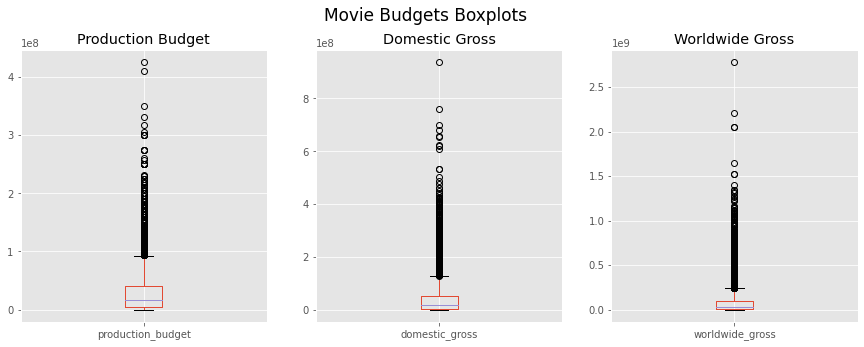

In [9]:
#plotting boxplots for production_budget, domestic_gross, and worldwide_gross columns

#setting the style
plt.style.use('ggplot')

#Creating a figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#creating a boxplot for the production_budget column
movie_budgets.boxplot(column='production_budget', ax=ax[0])
ax[0].set_title('Production Budget')

#creating a boxplot for the production_budget column
movie_budgets.boxplot(column='domestic_gross', ax=ax[1])
ax[1].set_title('Domestic Gross')

#creating a boxplot for the production_budget column
movie_budgets.boxplot(column='worldwide_gross', ax=ax[2])
ax[2].set_title('Worldwide Gross')

# Adding a figure title
fig.suptitle('Movie Budgets Boxplots', fontsize=17, y=1);

Looking at these boxplots, there are so many outliers for each column (production_budget, domestic gross, and worldwide gross), which, under other circumstances, could point to the possibility off placeholder values. However, these outliers are acceptable when it comes to movie production and box office. Its one of the reason where we can see a movie like Avatar grossing almost three (3) billion worldwide wile some other movies gross at less than one hundred (100) million worldwide, as shown in [Box Office Mojo's Top Lifetime Grosses](https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW). 

Hence, we move on to the next dataset, which is *tmdb.movies.csv*

#### Dataset 2: 'tmdb.movies.csv' from [TheMovieDB](https://www.themoviedb.org/)

**Loading the Dataset:**
First, we load the dataset for analysis into a Pandas DataFrame and assign it to a variable movie_information, then review the first 5 rows

In [10]:
#Loading the dataset into the more_information variable using pandas
#displaying the first 10 items of the dataframe

movie_data = pd.read_csv('tmdb.movies.csv')
movie_data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


After a closer  look at this dataset, we have several columns that contain data that is very useful fo our analysis, including title, genre_ids, popularity, and vote count. The genre, defined by genre IDs, categorizes films based on either their narrative or stylistic elements. The popularity and votecount columns helps us understand how much of an impact the film had on the audience. However, we need to review this dataset more and prepare it for analysis.

**Reviewing and Preparing the Dataset**

Next, we need to check whether we have any missing values in the data and duplicates and prepare it for analysis

In [11]:
#checking the number of column values and data types

movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Based on the above information, all our columns have values. However, we need to remove columns that are of no use to us, which means we remain with a dataframe with the title, as the index, then genre_ids, popularity, and vote count.

In [12]:
#removing unuseful columns from the dataset and displaying the first 5 data rows

movie_data = movie_data[['title', 'genre_ids', 'popularity', 'vote_average', 'vote_count']]
movie_data.head(5)

,title,genre_ids,popularity,vote_average,vote_count
0,Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",33.533,7.7,10788
1,How to Train Your Dragon,"[14, 12, 16, 10751]",28.734,7.7,7610
2,Iron Man 2,"[12, 28, 878]",28.515,6.8,12368
3,Toy Story,"[16, 35, 10751]",28.005,7.9,10174
4,Inception,"[28, 878, 12]",27.920,8.3,22186


In [13]:
#setting the title to be the dataframe's  index

movie_data.set_index('title', inplace=True)
movie_data

,genre_ids,popularity,vote_average,vote_count
title,,,,
Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",33.533,7.7,10788
How to Train Your Dragon,"[14, 12, 16, 10751]",28.734,7.7,7610
Iron Man 2,"[12, 28, 878]",28.515,6.8,12368
Toy Story,"[16, 35, 10751]",28.005,7.9,10174
Inception,"[28, 878, 12]",27.920,8.3,22186
...,...,...,...,...
Laboratory Conditions,"[27, 18]",0.600,0.0,1
_EXHIBIT_84xxx_,"[18, 53]",0.600,0.0,1
The Last One,"[14, 28, 12]",0.600,0.0,1


Since our columns appear to all have values, we need to check for duplicates first before  we proceed!

In [14]:
#checking for duplicates

duplicates = movie_data.duplicated()
print(duplicates)

# checking any record returns True
if duplicates.any():
    print('There are duplicates in this dataframe')
else:
    print('There are no duplicates in this dataframe')

title
Harry Potter and the Deathly Hallows: Part 1    False
How to Train Your Dragon                        False
Iron Man 2                                      False
Toy Story                                       False
Inception                                       False
                                                ...  
Laboratory Conditions                           False
_EXHIBIT_84xxx_                                 False
The Last One                                    False
Trailer Made                                    False
The Church                                      False
Length: 26517, dtype: bool
There are duplicates in this dataframe


Since there are duplicates in the records, let us first see what they are so we can remove them.

In [15]:
#reviewing duplicaates

duplicated_records = movie_data.loc[duplicates]
duplicated_records

,genre_ids,popularity,vote_average,vote_count
title,,,,
Slipknot: (sic)nesses,[10402],1.400,6.6,4
The Swing,[18],1.400,5.7,3
NowHere,[99],1.400,4.5,2
50 For Izzy,[99],1.154,4.5,2
Deleted Scenes,[18],0.904,7.0,2
...,...,...,...,...
Eden,[],0.600,0.0,1
Jaws,[16],0.600,0.0,1
Closing Time,[27],0.600,0.0,1


In [16]:
#removing the duplicates

movie_data = movie_data.drop_duplicates()
movie_data

,genre_ids,popularity,vote_average,vote_count
title,,,,
Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",33.533,7.7,10788
How to Train Your Dragon,"[14, 12, 16, 10751]",28.734,7.7,7610
Iron Man 2,"[12, 28, 878]",28.515,6.8,12368
Toy Story,"[16, 35, 10751]",28.005,7.9,10174
Inception,"[28, 878, 12]",27.920,8.3,22186
...,...,...,...,...
Laboratory Conditions,"[27, 18]",0.600,0.0,1
_EXHIBIT_84xxx_,"[18, 53]",0.600,0.0,1
The Last One,"[14, 28, 12]",0.600,0.0,1


Now, we have 25,943 data records after dropping the duplicates from the data. Every thing looks set for this dataset (outliers in this dataset are important: no need to remove them), now we proceed to the last and final dataset. Remember we will have to combine data from the different datasets for analysis. 

#### Dataset 3: 'bom.movie_gross.csv' from [Box Office Mojo](https://www.boxofficemojo.com/)

As for this dataset, we need to load it, review it, identify and address any missing values and duplicates, and remove unnessecary data columns.

In [17]:
#Loading and reviewing first 5 items

bom_movie_gross = pd.read_csv('bom.movie_gross.csv')
bom_movie_gross.head()                  

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [18]:
#Reviewing the dataset further 
#check for missing values and data in different columns

bom_movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Notably, we have some missing values in the foreign_gross column. Since we already have information related to box office from another dataset, we will ignore the same from this dataset. 

And since it would be prudent to use both foreign and domestic figures to get worldwide gross values, and we already have that in the movie_budgets dataframes, we will drop these two columns. 

As a result, we will only need the title and studio columns from this data set. 

In [19]:
#removing unnessecary columns
bom_movie_gross = bom_movie_gross[['title', 'studio']]
bom_movie_gross

,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW
...,...,...
3382,The Quake,Magn.
3383,Edward II (2018 re-release),FM
3384,El Pacto,Sony
3385,The Swan,Synergetic


In [20]:
#Checking for duplicates
record_duplicates = bom_movie_gross.duplicated()
record_duplicates

#Checking if any record returns True for duplicates
if record_duplicates.any():
    print('There are duplicates in this dataset')
else:
    print('There are no duplicates in this dataset')

There are no duplicates in this dataset


With no duplicates in this data, we proceed to check for missing values...

In [21]:
#checking for Missing Values in the dataset
bom_missing_values = bom_movie_gross.isna()
bom_missing_values

#checking whether any records return true for missing values
if bom_missing_values.any(axis=None):
    print('There are missing values in this dataset')
else:
    print('There are no missing values in this dataset')


There are missing values in this dataset


There are missing values in this dataset, so we need to drop the respective records. The reason why such records need to be dropped is because without one value, the respective record becomes useless to our analysis. For example in the first record, missing either the title and/or the studio means we cannot use that record. We need complete records from this dataset, that is, movie name and the production studio.

In [22]:
#dropping records with atleast one missing value
bom_movie_gross = bom_movie_gross.dropna()
bom_movie_gross

,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW
...,...,...
3382,The Quake,Magn.
3383,Edward II (2018 re-release),FM
3384,El Pacto,Sony
3385,The Swan,Synergetic


Before dropping, we had 3387 records, and now we have 3382 records. Hence, 5 records had at least one missing values. Now we need to set the title as the index for this dataset. 

In [23]:
#setting the title as the index for this dataset
bom_movie_gross.set_index('title', inplace=True)
bom_movie_gross

,studio
title,
Toy Story 3,BV
Alice in Wonderland (2010),BV
Harry Potter and the Deathly Hallows Part 1,WB
Inception,WB
Shrek Forever After,P/DW
...,...
The Quake,Magn.
Edward II (2018 re-release),FM
El Pacto,Sony


#### Combining the three datasets into one dataset

Now, we have three different datasets, which must be combined with the title (movie name) as the index. This new dataset will be assigned to the variable combined_movie_data for further cleaning and analysis. The combined_movie_data will return only records with matching title from the three datasets.

In [24]:
#joining movie_budgets and movie_data datasets
budget_and_data = movie_budgets.join(movie_data, how='inner')

#combining first and second datasets with third dataset
combined_movie_data = budget_and_data.join(bom_movie_gross, how='inner')
combined_movie_data.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,genre_ids,popularity,vote_average,vote_count,studio
title,,,,,,,,,,
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422,"[53, 878, 18]",17.892,6.9,4629,Par.
12 Strong,64,"Jan 19, 2018",35000000,45819713,71118378,"[10752, 18, 36, 28]",13.183,5.6,1312,WB
12 Years a Slave,18,"Oct 18, 2013",20000000,56671993,181025343,"[18, 36]",16.493,7.9,6631,FoxS
127 Hours,6,"Nov 5, 2010",18000000,18335230,60217171,"[12, 18, 53]",11.435,7.0,4469,FoxS
13 Hours: The Secret Soldiers of Benghazi,30,"Jan 15, 2016",50000000,52853219,69411370,"[28, 18, 36, 53, 10752]",21.486,7.0,1573,Par.


In [25]:
#reviewing the columns for this data
combined_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 10 Cloverfield Lane to mother!
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1246 non-null   int64  
 1   release_date       1246 non-null   object 
 2   production_budget  1246 non-null   int64  
 3   domestic_gross     1246 non-null   int64  
 4   worldwide_gross    1246 non-null   int64  
 5   genre_ids          1246 non-null   object 
 6   popularity         1246 non-null   float64
 7   vote_average       1246 non-null   float64
 8   vote_count         1246 non-null   int64  
 9   studio             1246 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 107.1+ KB


Now we have combined_movie_data dataset with  1246 records and 10 columns, most of which are needed for the analysis, with unnessecary ones to be dropped.

But first, the new dataset needs sorting in descending order using the worldwide_gross column

In [26]:
#sorting the dataset based on worldwide_gross column
combined_movie_data = combined_movie_data.sort_values('worldwide_gross', ascending=False)
combined_movie_data

,id,release_date,production_budget,domestic_gross,worldwide_gross,genre_ids,popularity,vote_average,vote_count,studio
title,,,,,,,,,,
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,"[12, 28, 14]",80.773,8.3,13948,BV
Jurassic World,34,"Jun 12, 2015",215000000,652270625,1648854864,"[28, 12, 878, 53]",20.709,6.6,14056,Uni.
Furious 7,67,"Apr 3, 2015",190000000,353007020,1518722794,"[28, 80, 53]",20.396,7.3,6538,Uni.
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963,"[28, 12, 878]",44.383,7.3,13457,BV
Black Panther,42,"Feb 16, 2018",200000000,700059566,1348258224,"[28, 16]",2.058,5.1,11,BV
...,...,...,...,...,...,...,...,...,...,...
Trance,31,"Dec 31, 2012",950000,0,0,"[53, 80, 18, 9648]",9.571,6.6,1348,FoxS
Eden,66,"Jan 19, 2016",2300000,0,0,"[53, 18]",3.061,5.4,29,BG
Eden,66,"Jan 19, 2016",2300000,0,0,"[18, 10402]",5.373,5.8,57,BG


We need to restructure this data further, by replacing the genre_ids values with the respective genre names and separating the release_date column to year and month columns. We  will also remove the id column from the dataset because it is unnesseary for the analysis.

First, we need to drop the *id column* from the dataset

In [27]:
#removing the id column from the dataset
combined_movie_data.drop('id', axis=1, inplace=True)
combined_movie_data

,release_date,production_budget,domestic_gross,worldwide_gross,genre_ids,popularity,vote_average,vote_count,studio
title,,,,,,,,,
Avengers: Infinity War,"Apr 27, 2018",300000000,678815482,2048134200,"[12, 28, 14]",80.773,8.3,13948,BV
Jurassic World,"Jun 12, 2015",215000000,652270625,1648854864,"[28, 12, 878, 53]",20.709,6.6,14056,Uni.
Furious 7,"Apr 3, 2015",190000000,353007020,1518722794,"[28, 80, 53]",20.396,7.3,6538,Uni.
Avengers: Age of Ultron,"May 1, 2015",330600000,459005868,1403013963,"[28, 12, 878]",44.383,7.3,13457,BV
Black Panther,"Feb 16, 2018",200000000,700059566,1348258224,"[28, 16]",2.058,5.1,11,BV
...,...,...,...,...,...,...,...,...,...
Trance,"Dec 31, 2012",950000,0,0,"[53, 80, 18, 9648]",9.571,6.6,1348,FoxS
Eden,"Jan 19, 2016",2300000,0,0,"[53, 18]",3.061,5.4,29,BG
Eden,"Jan 19, 2016",2300000,0,0,"[18, 10402]",5.373,5.8,57,BG


Second, we create new and separate columns for year and month and drop the *release_date column* from the dataset

In [28]:
#Creating new columns for month and year

#creating new column for year
combined_movie_data['year'] = combined_movie_data['release_date'].str[-4:]

#creating new column for year
combined_movie_data['month'] = combined_movie_data['release_date'].str[:3]

#droppng the release_year column
combined_movie_data.drop('release_date', axis=1, inplace=True)
combined_movie_data

,production_budget,domestic_gross,worldwide_gross,genre_ids,popularity,vote_average,vote_count,studio,year,month
title,,,,,,,,,,
Avengers: Infinity War,300000000,678815482,2048134200,"[12, 28, 14]",80.773,8.3,13948,BV,2018,Apr
Jurassic World,215000000,652270625,1648854864,"[28, 12, 878, 53]",20.709,6.6,14056,Uni.,2015,Jun
Furious 7,190000000,353007020,1518722794,"[28, 80, 53]",20.396,7.3,6538,Uni.,2015,Apr
Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]",44.383,7.3,13457,BV,2015,May
Black Panther,200000000,700059566,1348258224,"[28, 16]",2.058,5.1,11,BV,2018,Feb
...,...,...,...,...,...,...,...,...,...,...
Trance,950000,0,0,"[53, 80, 18, 9648]",9.571,6.6,1348,FoxS,2012,Dec
Eden,2300000,0,0,"[53, 18]",3.061,5.4,29,BG,2016,Jan
Eden,2300000,0,0,"[18, 10402]",5.373,5.8,57,BG,2016,Jan


Third, we replace the *genre_ids column* values with their respective genre names, using data matching genre names to their respective genre ids, which is provided on [The Movie Database Support](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee). 

Before replacing, we first need to check whether there are missing values in the genre_ids column. Afterward, the column name is changed to *genres* 

In [29]:
#Checking for missing values in genre_ids column
combined_movie_data['genre_ids'].isna().sum()

0

Good, no missing values. Checking the missing values helps us avoid running into errors because the the next step would result in an error if it finds missing values

Further, we check for *invalid genre ids* remove them, then replace genre_ids with genre names for analysis

In [30]:
#Checking and removing invalid_genre_ids in the data
#creating a new column with genre names
#dropping genre_ids column

#Convert any string representations as actual strings
import ast
combined_movie_data['genre_ids'] = combined_movie_data['genre_ids'].apply(lambda x: [int(i) for i in ast.literal_eval(x)])

#converting genre_ids value lists into integer
combined_movie_data['genre_ids'] = combined_movie_data['genre_ids'].apply(lambda x: [int(i) for i in x])

#creating a dict matching genre ids to genre names
genre_dict = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

#identifying invalid_genre_ids
#These are genre ids in the dataset not found in the genre_dict
invalid_genre_ids = set()
for x in combined_movie_data['genre_ids']:
    invalid_genre_ids.update(set(x) - set(genre_dict.keys()))
invalid_genre_ids

#Creating a function that replaces genre ids with genre names while ignoring invalid genre ids.
def replace_genre_ids_with_names(genre_ids):
    if not genre_ids:
        return []
    genre = []
    for genre_id in genre_ids:
        try:
            genre_name = genre_dict[genre_id]
            genre.append(genre_name)
        except KeyError:
            continue
    return genre

#applying the function to the dataset
combined_movie_data['genre'] = combined_movie_data['genre_ids'].apply(replace_genre_ids_with_names)
combined_movie_data.drop('genre_ids', axis=1, inplace=True)  # drop original column
combined_movie_data


,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,studio,year,month,genre
title,,,,,,,,,,
Avengers: Infinity War,300000000,678815482,2048134200,80.773,8.3,13948,BV,2018,Apr,"[Adventure, Action, Fantasy]"
Jurassic World,215000000,652270625,1648854864,20.709,6.6,14056,Uni.,2015,Jun,"[Action, Adventure, Science Fiction, Thriller]"
Furious 7,190000000,353007020,1518722794,20.396,7.3,6538,Uni.,2015,Apr,"[Action, Crime, Thriller]"
Avengers: Age of Ultron,330600000,459005868,1403013963,44.383,7.3,13457,BV,2015,May,"[Action, Adventure, Science Fiction]"
Black Panther,200000000,700059566,1348258224,2.058,5.1,11,BV,2018,Feb,"[Action, Animation]"
...,...,...,...,...,...,...,...,...,...,...
Trance,950000,0,0,9.571,6.6,1348,FoxS,2012,Dec,"[Thriller, Crime, Drama, Mystery]"
Eden,2300000,0,0,3.061,5.4,29,BG,2016,Jan,"[Thriller, Drama]"
Eden,2300000,0,0,5.373,5.8,57,BG,2016,Jan,"[Drama, Music]"


Lastly, we do not need the domestic_gross column, we have the worldwide_gross, which factors in a total of domestic gross and foreign gross. In that regard, it has to be removed.

In [31]:
#removing domestic gross
combined_movie_data.drop('domestic_gross', axis=1, inplace=True)
combined_movie_data.head()

,production_budget,worldwide_gross,popularity,vote_average,vote_count,studio,year,month,genre
title,,,,,,,,,
Avengers: Infinity War,300000000,2048134200,80.773,8.3,13948,BV,2018,Apr,"[Adventure, Action, Fantasy]"
Jurassic World,215000000,1648854864,20.709,6.6,14056,Uni.,2015,Jun,"[Action, Adventure, Science Fiction, Thriller]"
Furious 7,190000000,1518722794,20.396,7.3,6538,Uni.,2015,Apr,"[Action, Crime, Thriller]"
Avengers: Age of Ultron,330600000,1403013963,44.383,7.3,13457,BV,2015,May,"[Action, Adventure, Science Fiction]"
Black Panther,200000000,1348258224,2.058,5.1,11,BV,2018,Feb,"[Action, Animation]"


Everything is set, now we proceed to analysing the data

## Data Analysis and Visualization

Now that the **Combined Movie Data** is as clean as it can be, its time to do some analysis. In this analysis, much focus will be on comparisons between top movies and bottom movies in terms of genres, release month, studio, popularity, vote_count, and vote_average.

Visualizations will help identify some of these relationships and what they mean to Microsoft's production studio. For example, is there a correlation between popularity and box office? Other questions would be, does the release month affect the popularity and movies' box office? And are there any relationships between production costs, popularity, and worldwide grossing.

These are some of the questions that will guide the analysis, so we proceed!!

### Production Budget vs Box Office figures

Understanding the relationship between production budgets and worldwide gross can help predict, to some level, whether investing more in movie production will result in high grosses. 

As a result, an horizontal bar chart that compares costs vs revenues for the top 30 and bottom 30 movies will be appropriate for this analysis.

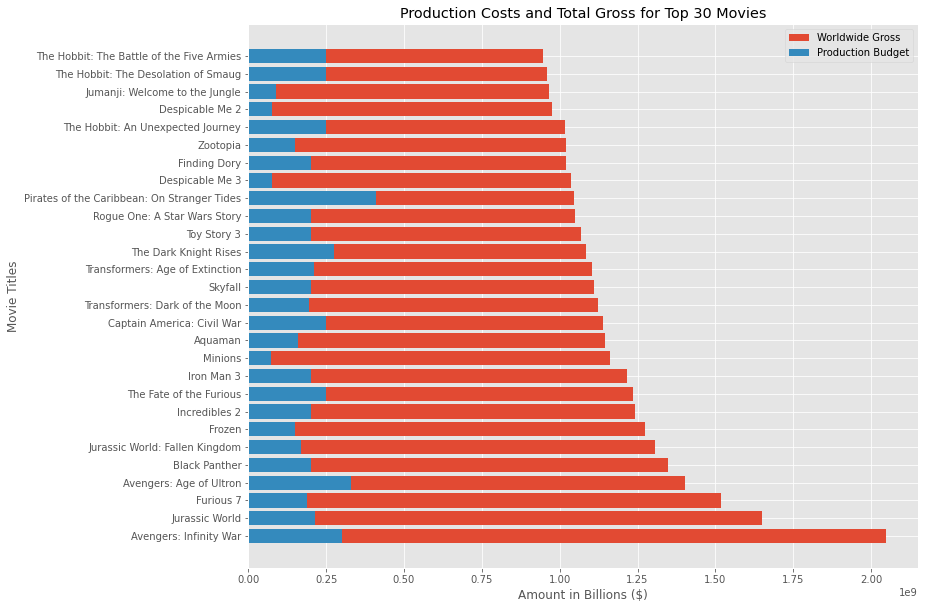

In [32]:
# Getting the top 30 movies
top_30_movies = combined_movie_data.sort_values('worldwide_gross', ascending=False).head(30)

#reset the index for top_30_movies
top_30_movies.reset_index(drop=False, inplace=True)

# Setting the style
plt.style.use('ggplot')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the data
ax.barh(top_30_movies['title'], top_30_movies['worldwide_gross'], label='Worldwide Gross')
ax.barh(top_30_movies['title'], top_30_movies['production_budget'], label='Production Budget')

# Set the axis labels and title
ax.set_xlabel('Amount in Billions ($)')
ax.set_ylabel('Movie Titles')
ax.set_title('Production Costs and Total Gross for Top 30 Movies')

# Add a legend
ax.legend()

# Show the plot
plt.show();



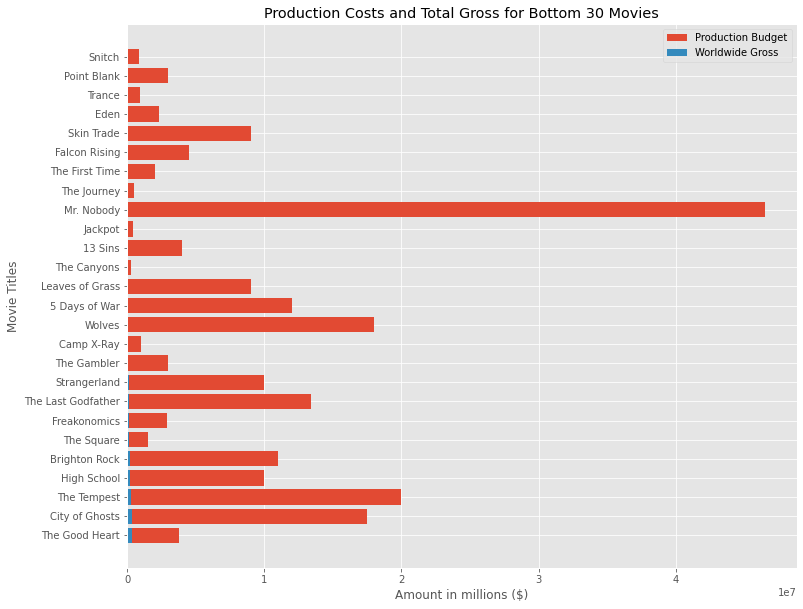

In [33]:
# Getting the top 30 movies
bottom_30_movies = combined_movie_data.sort_values('worldwide_gross', ascending=False).tail(30)

#reset the index for top_30_movies
bottom_30_movies.reset_index(drop=False, inplace=True)

# Setting the style
plt.style.use('ggplot')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the data
ax.barh(bottom_30_movies['title'], bottom_30_movies['production_budget'], label='Production Budget')
ax.barh(bottom_30_movies['title'], bottom_30_movies['worldwide_gross'], label='Worldwide Gross')

# Set the axis labels and title
ax.set_xlabel('Amount in millions ($)')
ax.set_ylabel('Movie Titles')
ax.set_title('Production Costs and Total Gross for Bottom 30 Movies')

# Add a legend
ax.legend()

# Show the plot
plt.show();


Based on the top 30 movies chart, there is no correlation between the production budget and box office. The Avengers: Infinity War, the highest grossing movie in this dataset, appears to have the near-similar production budgets with most of the other movies in this list, most ranging between $150 millions and $ 500 millions. 

However, that changes when it comes to the bottom 30 movies, with appear to cost more in production but bring very little in revenue. Since these movies cost $50 million or less, it could be argued that spending such an amount would probably result in a less profitable movie.

Although minimal correlation exists when the chats are reviewed individually, looking at them together shows that there is some amount of money the studio must be willing to invest in to ensure profitability.

### Monthly Release Dates for the top 100 Movies

Here, we need to understand which month saw the release of the most movies from the top 200 list. This will help in comparing whether the release month plays any role on a movie's audience reception

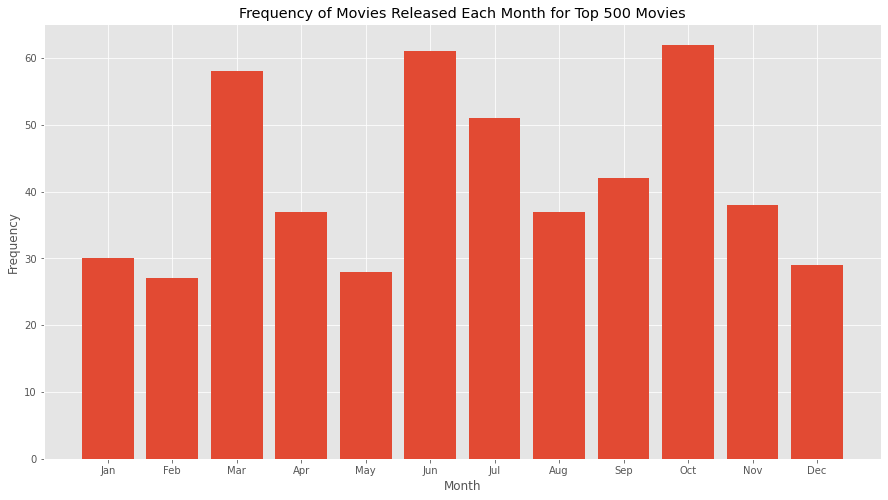

In [34]:
# Get the top 500 movies
top_500_movies = combined_movie_data.sort_values('worldwide_gross', ascending=False).head(500)

#reseting the index for this dataframe
top_500_movies.reset_index(drop=False, inplace=True)

# Group the movies by month and count the number of movies in each month
movies_by_month = top_500_movies.groupby('month')['title'].count()

# Order the months according to the calendar year
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the data as a bar chart
ax.bar(movies_by_month.index, movies_by_month.values)

# Set the x-axis tick locations and labels
ax.set_xticks(range(12))
ax.set_xticklabels(month_order)

# Set the axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Movies Released Each Month for Top 500 Movies');

# Show the plot
plt.show();

From this chart, highest number of movies in the top 500 list were released around March and April, June and July, then September, October, and November. Although Other factors could also influence such figures, it would be important to consider the month when deciding when to release movies. 

Besides, there might be other factors that influence people to watch movies more during these months such as weather, when its cold and people have to stay indoors. For example, the the highest months are June and July, where most people might end up staying indoors due to winter climates in most parts of the world.

Hence, its important to understand the months when people are more inclined to watch movies, while also considering other factors.

### Studios with the Highest number of Movies in Top 250 List

Further, its important to understand the production studios with the highest number of grossing movies in the top 200, which will help to understand who to partner with and possibly where to borrow ideas from. 

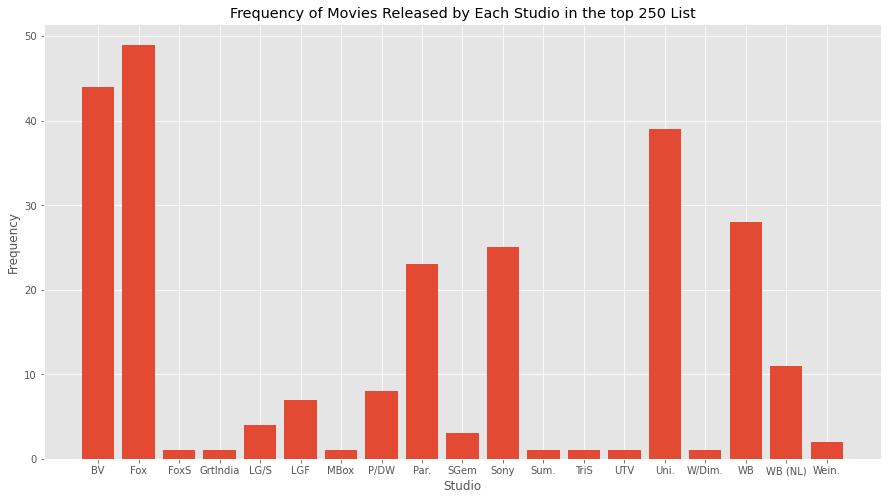

In [35]:
# Getting the top 250 movies
top_250_movies = combined_movie_data.sort_values('worldwide_gross', ascending=False).head(250)

#reseting the index for this dataframe
top_250_movies.reset_index(drop=False, inplace=True)

# Group the movies by month and count the number of movies in each month
movies_by_studio = top_250_movies.groupby('studio')['title'].count()

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the data as a bar chart
ax.bar(movies_by_studio.index, movies_by_studio.values)

# Set the axis labels and title
ax.set_xlabel('Studio')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Movies Released by Each Studio in the top 250 List');

# Show the plot
plt.show();

The chart shows significant differences in the number of top 250 grossing movies in the dataset released by different studios. Fox leads the chart with around 49 movies in the top 250, followed by Bueno Vista (BV) Pictures (a production studio under Walt Disney Studios) with 44 movies, then Universal Studios with 39 movies, and Warner Bros (WB) pictures with 28 movies as well as Sony and Paramount (Par.) Pictures with 25 and 23 respectively. 

These are some of the Studios that have successfuly dominated the market, producing highest grossing films, which means higher profits for parent companies and shareholders. As a result, they provide a good opportunity for Microsoft studios to learn from or partner with.

### Most Common Genres in Highest Grossing Films

Now, a review a of genres and their frequencies in the top 100 movies would helps us understand the most profitable ones. We will do so by creating an horizontal bar charts for how much each appears in the top 100 movies

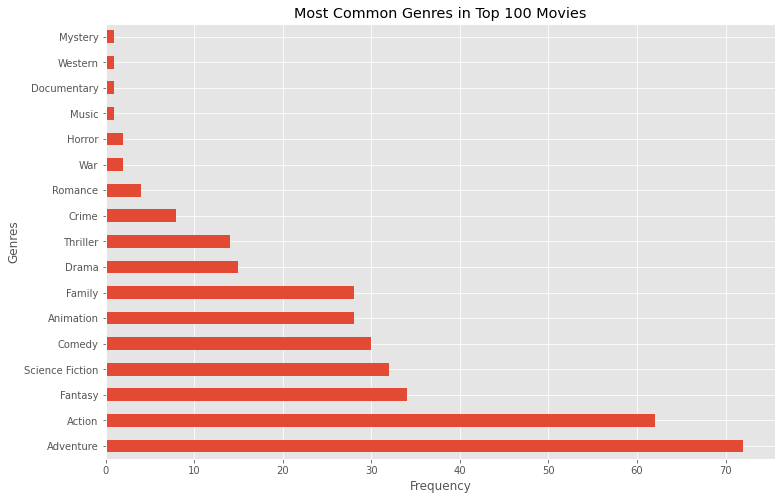

In [36]:
# Get the top 100 movies
top_100_movies = combined_movie_data.sort_values('worldwide_gross', ascending=False)[:100]

# Extract the genre column and convert it to a list
genre_list = top_100_movies['genre'].dropna().tolist()

# Split the genre list into individual genres
genre_counts = pd.Series([genre for genres in genre_list for genre in (genres.split(',') if isinstance(genres, str) else genres)]).value_counts()

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the genre counts as a horizontal bar chart
genre_counts.plot(kind='barh', ax=ax)

# Set the axis labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('Genres')
ax.set_title('Most Common Genres in Top 100 Movies')

# Show the plot
plt.show();


The horizontal bar chart shows Adventures (70+) is the most common genre in the top 100 highest grossing movies, followed by Action (around 63), Fantasy (around 34), science fiction (around 32), comedy (30), animation (27), and family (27). The results are indicative of the genres that interest most viewers, which translate to high worldwide grosses.

As a result, focusing on these genres, especially by providing viewers with movies that combine a few of the top genres provides a viable opportunity for capturing the global film market.

## Conclusion and Recommendations

Through this analysis, its easier to understand the correlations between different variables and determine MICROSOFT, through its new studio, can leverage on such correlations to exploit opportunities in the movie and film markets.

The analysis sought to determine whether correlations exists between production costs and box office performance, release month and box office performance, movie genre and gross performance, and lastly, production studio and box office performance. The results and visualizations have shown a strong cconnection between type of movies (genre) and performance as well as production studio and performance. However, such correlation is very low on production budget and release month.

In that regard, I recommend four (4) strategic actions in movie development process that Microsoft to ensure swift results, as indicated below from highest priority to lowest priority.
* Produce Movies that align with Adventure, Action, Fantasy, Science Fiction, and Comedy. A very good movie would integrate a combination of around 2-3 genres, with adventure being a priority. This strategic proposal relates with the data results, which show that viewers are more appealed by movies with some adventures with a combination of either action, fantasy, and science fiction among others
* Partner with production studios such as Warner Bros, Fox, Universal Sudios, and Walt Disney Studio pictures. These studios understand what the clients desire in movies and have leveraged on that to produce movies that bring in high revenues. Microsoft should partner with these studios to improve its chancecs of success while also learning some tricks in the process.
* Microsoft's new studio should also try to integrate the element of production cost, although this of low priority. It should avoid movies costing less than 100 million dollars as they result in low or no returns. 
* Lastly, it could also consider release month, focusing on months of March, June, July, and September, when a majority of highest grossing movies tend to be released. Popular studios understand that customers are more inclined to watch movies during these reasons for a plethora of reasons.